In [43]:

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# for Trial - dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
learning_rate = 0.005
training_epochs = 1000
display_step = 50


train_X = numpy.asarray([1.,2.,4.,3.,5.])
train_Y = numpy.asarray([1.,3.,3.,2.,5.])
n_samples = train_X.shape[0]


X = tf.placeholder("float")
Y = tf.placeholder("float")


W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


pred = tf.add(tf.multiply(X, W), b)


cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)


Epoch: 0050 cost= 0.242882490 W= 0.846651 b= 0.222467
Epoch: 0100 cost= 0.242623761 W= 0.847481 b= 0.230379
Epoch: 0150 cost= 0.242417902 W= 0.84574 b= 0.237257
Epoch: 0200 cost= 0.242227644 W= 0.843943 b= 0.243813
Epoch: 0250 cost= 0.242052585 W= 0.842215 b= 0.250096
Epoch: 0300 cost= 0.241891578 W= 0.840557 b= 0.256117
Epoch: 0350 cost= 0.241743445 W= 0.838969 b= 0.261889
Epoch: 0400 cost= 0.241607100 W= 0.837447 b= 0.267421
Epoch: 0450 cost= 0.241481617 W= 0.835988 b= 0.272723
Epoch: 0500 cost= 0.241366178 W= 0.834589 b= 0.277805
Epoch: 0550 cost= 0.241259962 W= 0.833249 b= 0.282676
Epoch: 0600 cost= 0.241162181 W= 0.831964 b= 0.287345
Epoch: 0650 cost= 0.241072178 W= 0.830732 b= 0.29182
Epoch: 0700 cost= 0.240989417 W= 0.829552 b= 0.296109
Epoch: 0750 cost= 0.240913197 W= 0.828421 b= 0.30022
Epoch: 0800 cost= 0.240842894 W= 0.827336 b= 0.30416
Epoch: 0850 cost= 0.240778282 W= 0.826297 b= 0.307937
Epoch: 0900 cost= 0.240718842 W= 0.825301 b= 0.311557
Epoch: 0950 cost= 0.240663961 W=

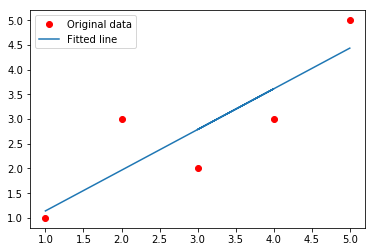

Testing... (Mean square loss Comparison)
Testing cost= 4.96894
Absolute mean square loss difference: 4.72832


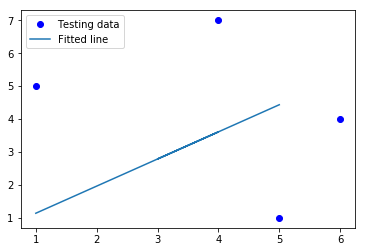

In [47]:

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


init = tf.global_variables_initializer()


with tf.Session() as sess:

   
    sess.run(init)

    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

   
    test_X = numpy.asarray([5.,6.,4.,1.])
    test_Y = numpy.asarray([1.,4.,7.,5.])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
plt.show()